# Plotting Transit Ephemeris Plots

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=1.2,rc={"font":"helvetica"});
sns.set_style("white"); #sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
import sys
sys.path.append("../src/")

import getpass
# Remove gks paths (not needed for anyone else)
if getpass.getuser()=="gks":
    try:
        sys.path.remove("/Users/gks/Dropbox/mypylib/notebooks/GIT/transitMCMC/src")
        sys.path.remove("/Users/gks/Dropbox/mypylib")
    except Exception as e:
        print(e)
        print("Paths already removed")

        # ---------- Graphics ------------
# matplotlib
import seaborn as sns; sns.set()
sns.set_context("poster",font_scale=1.2,rc={"font":"helvetica"}); 
sns.set_style("white");
cp = sns.color_palette("colorblind") 

%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 200
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=7
rcParams['xtick.minor.width']=1
rcParams['xtick.minor.size']=4
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=7
rcParams['ytick.minor.width']=1
rcParams['ytick.minor.size']=4

In [2]:
import utils
import transit_ephemeris_plots

/Users/gks/anaconda/lib/python2.7/site-packages/pysynphot-0.9.8.5.dev5-py2.7-macosx-10.6-x86_64.egg/pysynphot/locations.py:119: UserWarning: Extinction files should be moved to $PYSYN_CDBS/extinction for compatibility with future versions of pysynphot.
  warnings.warn('Extinction files should be moved to '
/Users/gks/anaconda/lib/python2.7/site-packages/pysynphot-0.9.8.5.dev5-py2.7-macosx-10.6-x86_64.egg/pysynphot/locations.py:155: UserWarning: Extinction files not found in /Users/gks/Dropbox/mypylib/notebooks/GIT/pysynphot/grp/hst/cdbs/grid/extinction
  warnings.warn('Extinction files not found in %s' % (extdir,))


# Joint Chen et al. 2018, Hirano et al. 2016 vs joint-fit from this work

2017-02-11 18:26:51.359999
2014-11-16 11:45:23.904008


../src/transit_ephemeris_plots.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_ref['ephemeris_drift'] = df_ref.TC.values-df_ref.TC.values
../src/transit_ephemeris_plots.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_ref['ephemeris_drift_err1'] = df_ref.TC_err1.values*DAY_TO_MIN
../src/transit_ephemeris_plots.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

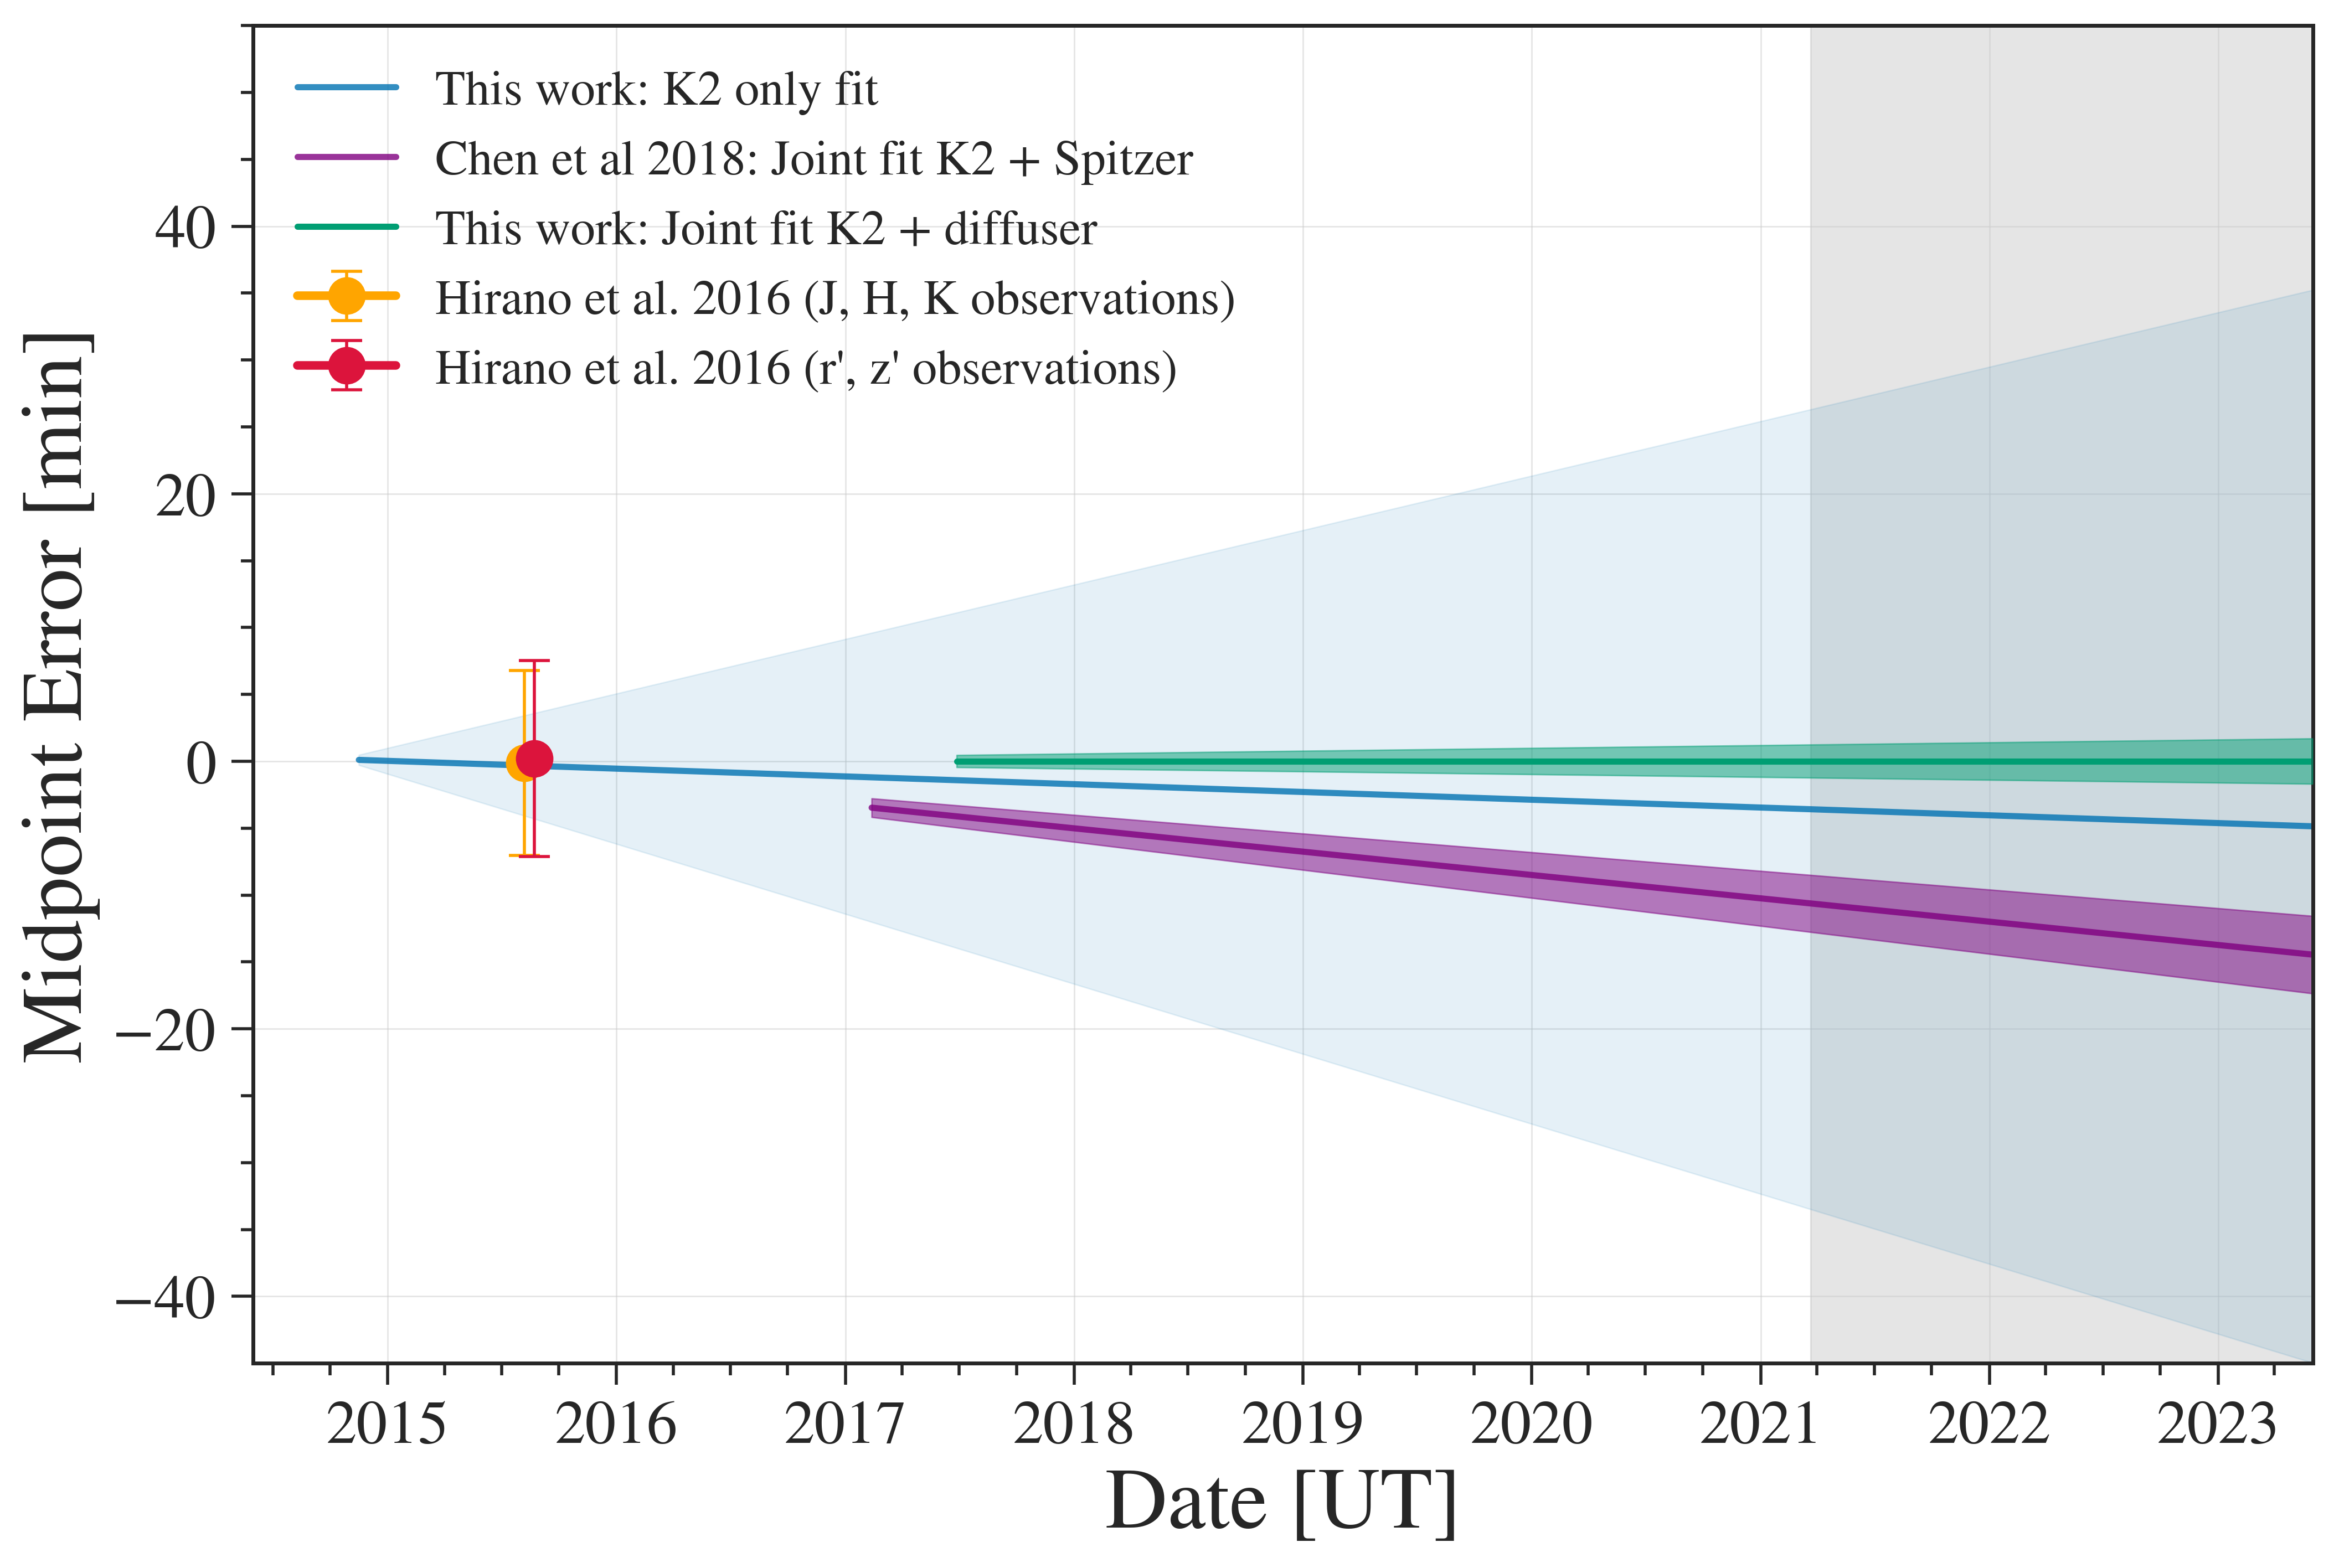

In [3]:
# K2 - ours
P_0      = 2.260443
P_0_err1 = 0.000020
P_0_err2 = 0.000020
TC_0     = 2456977.98986
TC_0_err1= 0.00026
TC_0_err2= 0.00027

# joint - Chen
P_1      = 2.2604380
P_1_err1 = 0.0000015
P_1_err2 = 0.0000015
TC_1     = 2457796.26865
TC_1_err1= 0.00048
TC_1_err2= 0.00049

print(utils.jd2datetime([TC_1])[0])
# joint - ours
P_2      = 2.2604455
P_2_err1 = 0.0000009
P_2_err2 = 0.0000009
TC_2     = 2457931.89779
TC_2_err1= 0.00032
TC_2_err2= 0.00031

DAY_TO_MIN = 24.*60.
# The more early ephemeris
STOP = '2023-06-01 00:00:00'

start = str(utils.jd2datetime([TC_0])[0])
print(start)

df_ref1, df_com1 =  transit_ephemeris_plots.plot_transit_ephemeris_error_comparison(P_0,
                                                          TC_0,
                                                          P_0_err1,
                                                          P_0_err2,
                                                          TC_0_err1,
                                                          TC_0_err2,
                                                          P_2,
                                                          TC_2,
                                                          P_2_err1,
                                                          P_2_err2,
                                                          TC_2_err1,
                                                          TC_2_err2,
                                                          start='2014-11-16 00:45:29.088007',
                                                          stop=STOP,
                                                          plot=False)

df_ref2, df_com2 =  transit_ephemeris_plots.plot_transit_ephemeris_error_comparison(P_1,
                                                          TC_1,
                                                          P_1_err1,
                                                          P_1_err2,
                                                          TC_1_err1,
                                                          TC_1_err2,
                                                          P_2,
                                                          TC_2,
                                                          P_2_err1,
                                                          P_2_err2,
                                                          TC_2_err1,
                                                          TC_2_err2,
                                                          start=str(utils.jd2datetime([TC_1])[0]),#"2014-11-18 18:00:00",
                                                          stop=STOP,plot=False)

fig, ax = plt.subplots(figsize=(12,8),dpi=200)

ax.fill_between(df_com1.index,df_com1['ephemeris_drift_err1'],df_com1['ephemeris_drift_err2'],alpha=0.1,color=cp[0])
ax.plot(df_com1.index,df_com1['ephemeris_drift'],color=cp[0],alpha=0.8,ls='-',lw=2,zorder=1,label='This work: K2 only')

ax.fill_between(df_com2.index,df_com2['ephemeris_drift_err1'],df_com2['ephemeris_drift_err2'],alpha=0.5,color='purple')
ax.plot(df_com2.index,df_com2['ephemeris_drift'],color='purple',alpha=0.8,ls='-',lw=2,zorder=2,label='Chen et al. 2018: Joint fit')

ax.plot(df_ref2.index,df_ref2['ephemeris_drift'],color=cp[1],ls='-',lw=2)
ax.fill_between(df_ref2.index,df_ref2['ephemeris_drift_err1'],df_ref1['ephemeris_drift_err2'],
                alpha=0.5,color=cp[1],zorder=3,label='This work: Joint fit K2 + diffuser')

ax.grid(lw=0.5,alpha=0.5)
ax.minorticks_on()
ax.tick_params(axis='both',labelsize=20,pad=5)
ax.set_xlabel("Date [UT]",fontsize=28)
ax.set_ylabel("Midpoint Error [min]",fontsize=28)
ax.set_xlim('2014-06-01 00:00:00',STOP)
ylim = (-45,55)
ax.set_ylim(ylim)

ax.errorbar(utils.jd2datetime([2457242.4620]),(np.round((2457242.4620-2457931.89779)/2.26044547)*2.26044547+2457931.89779-2457242.4620)*24*60.,
            0.0048*24*60.,mew=1.,marker='o',barsabove=True,capthick=1,capsize=5,elinewidth=1.,
            color='orange',label="Hirano et al. 2016 (J, H, K observations)",zorder=5)
ax.errorbar(utils.jd2datetime([2457258.2849]),(np.round((2457258.2849-2457931.89779)/2.26044547)*2.26044547+2457931.89779-2457258.2849)*24*60.,
            0.0051*24*60.,mew=1.,marker='o',barsabove=True,capthick=1,capsize=5,elinewidth=1.,
            color='crimson',label="Hirano et al. 2016 (r', z' observations)",zorder=6)

x = utils.arange_time('2021-03-21T00:00:00','2023-06-01T00:00:00')
y_min = ylim[0]*np.ones(len(x))
y_max = ylim[1]*np.ones(len(x))
ax.fill_between(x,y_min,y_max,color='gray',alpha=0.2,zorder=-1)

lines, handles = ax.get_legend_handles_labels()
ax.legend(np.array(lines)[[0,1,2,4,5]],['This work: K2 only fit',
                           'Chen et al 2018: Joint fit K2 + Spitzer',
                           'This work: Joint fit K2 + diffuser',
                            "Hirano et al. 2016 (J, H, K observations)",
                           "Hirano et al. 2016 (r', z' observations)"],
                           loc='upper left',
                           fontsize=16)
fig.savefig('../figures/ephemeris_k2_28b.png',dpi=200)

# K2-100b

2015-04-28 05:15:56.159985
2017-03-16 04:38:36.671991


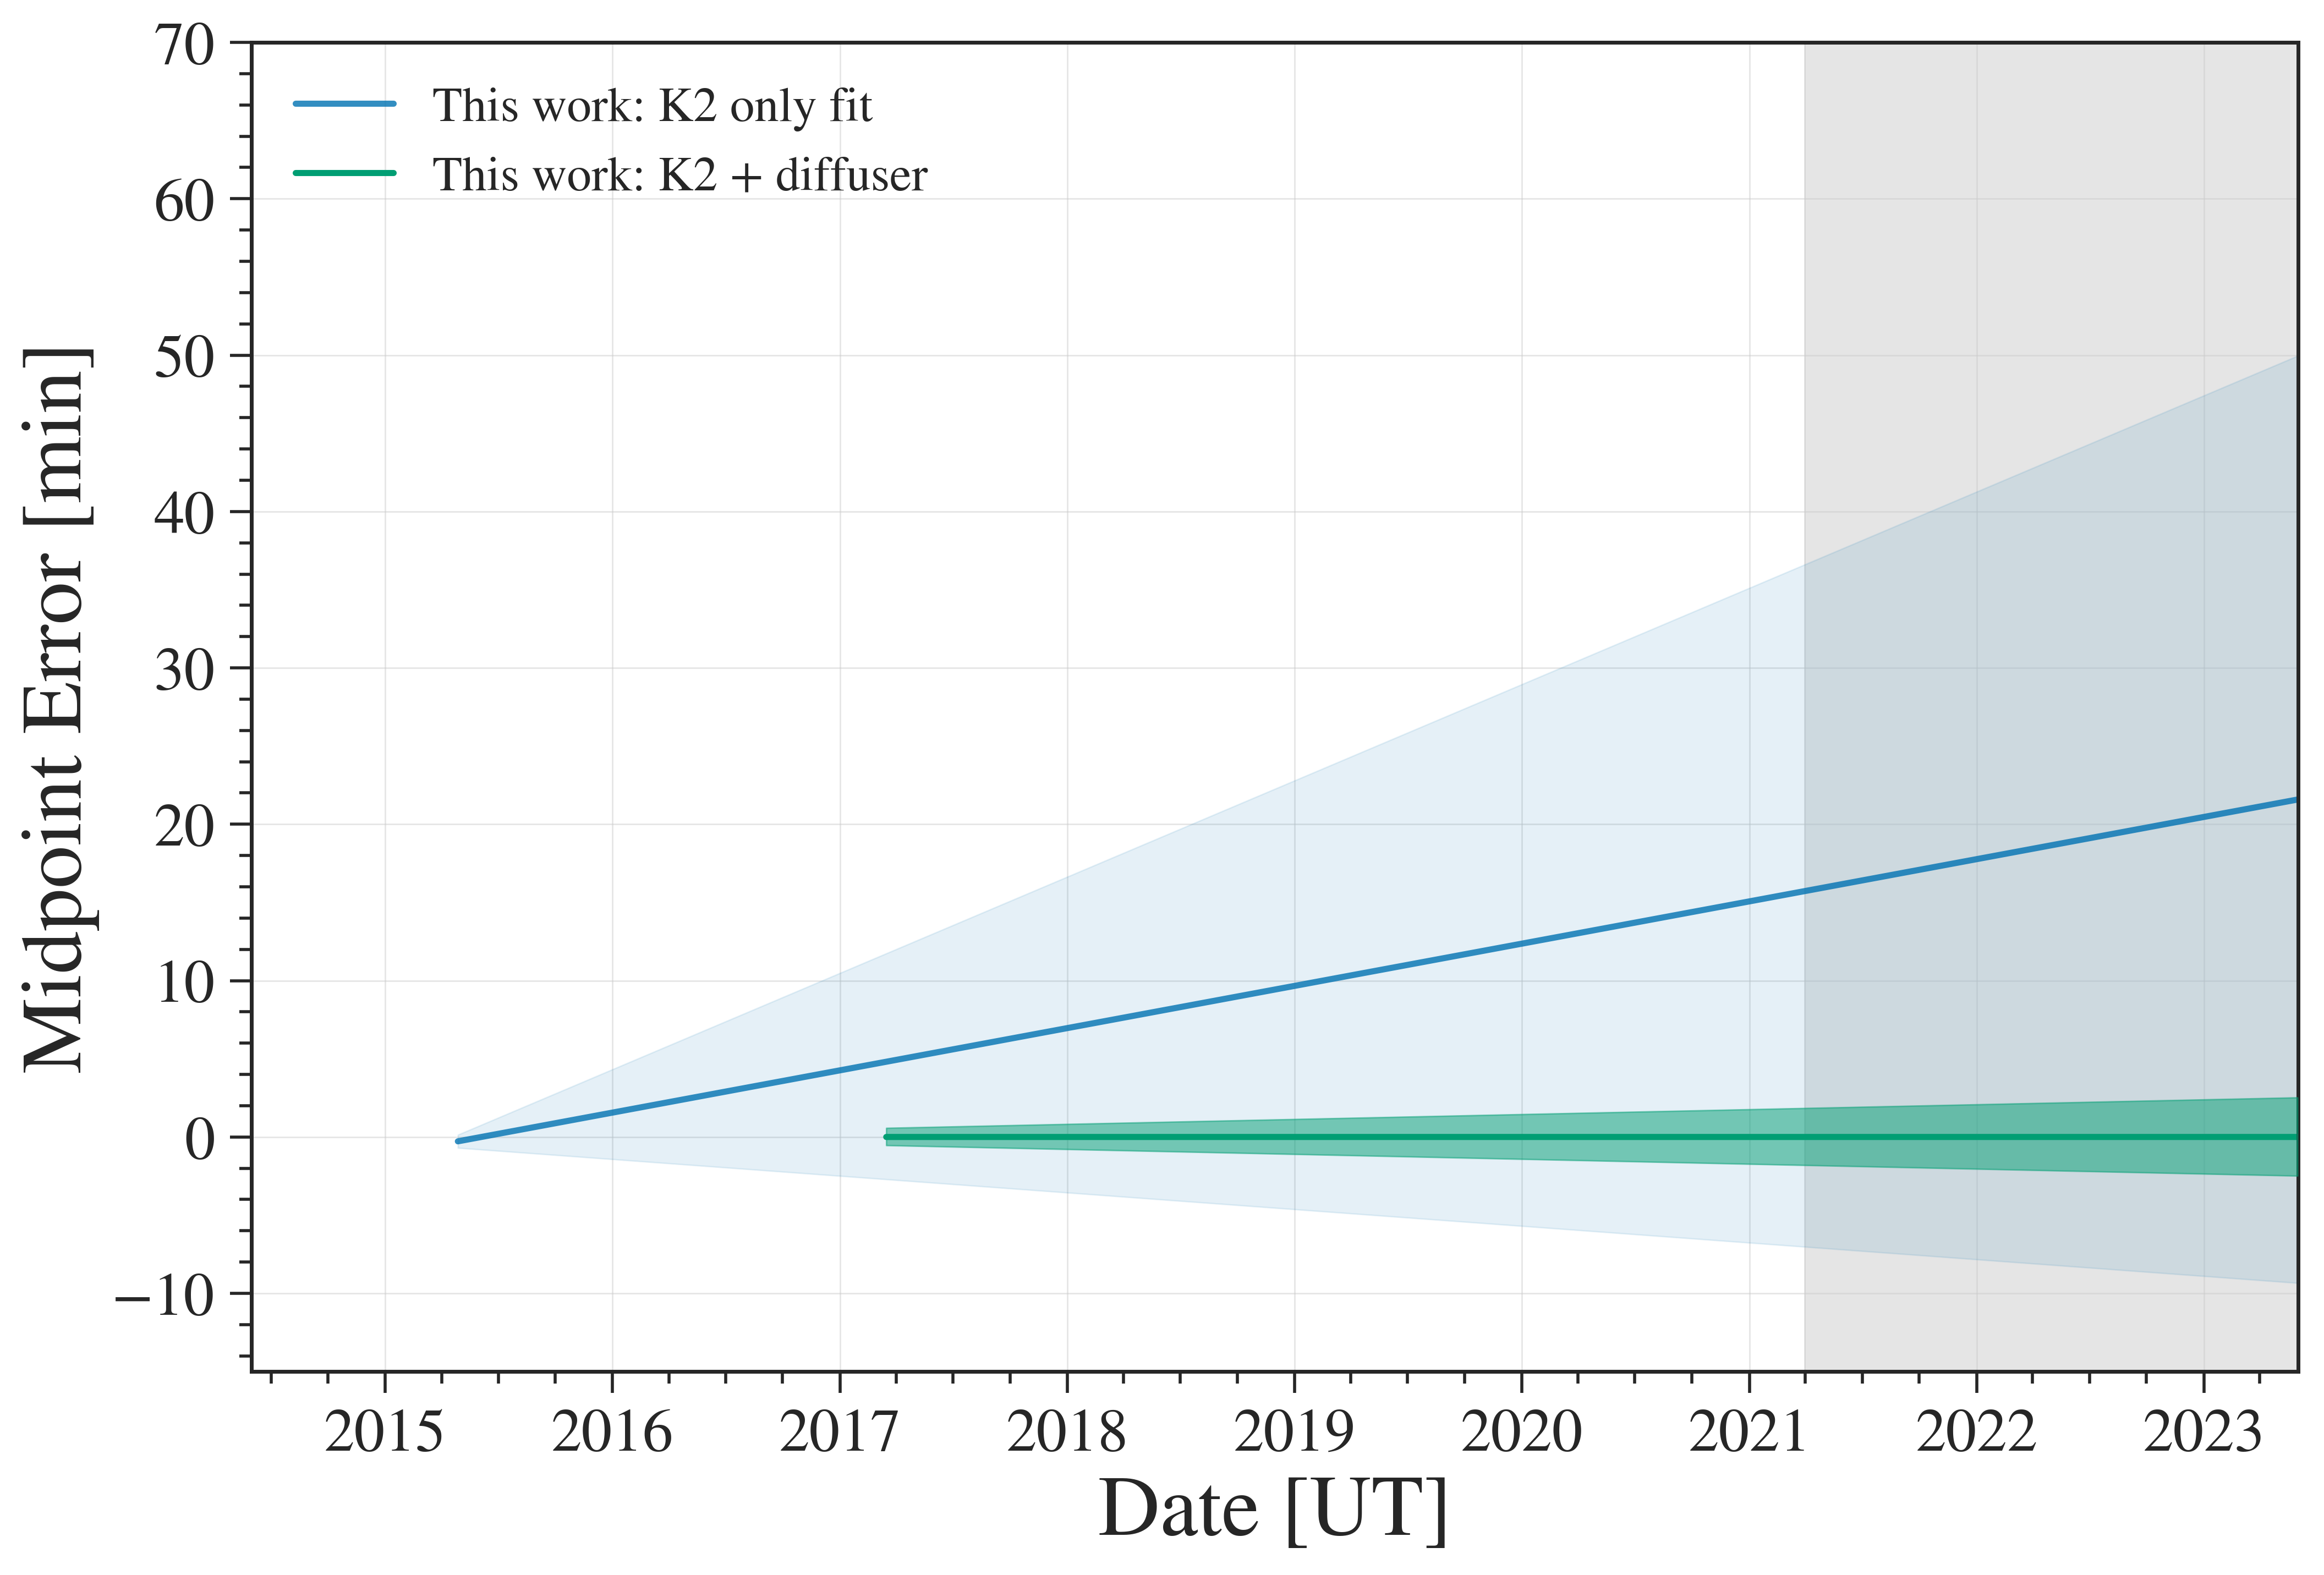

In [4]:
STOP = '2023-06-01 00:00:00'
# K2
P_1      = 1.673911
P_1_err1 = 0.000011
P_1_err2 = 0.000012
TC_1     = 2457140.7194
TC_1_err1= 0.00029
TC_1_err2= 0.00029
print(utils.jd2datetime([TC_1])[0])
# Joint
P_2      = 1.6739024
P_2_err1 = 0.0000010
P_2_err2 = 0.0000010
TC_2     = 2457828.69348
TC_2_err1= 0.00040
TC_2_err2= 0.00037
print(utils.jd2datetime([TC_2])[0])
fig, ax = plt.subplots(figsize=(12,8),dpi=200)

df_ref, df_com =  transit_ephemeris_plots.plot_transit_ephemeris_error_comparison(P_1,
                                                          TC_1,
                                                          P_1_err1,
                                                          P_1_err2,
                                                          TC_1_err1,
                                                          TC_1_err2,
                                                          P_2,
                                                          TC_2,
                                                          P_2_err1,
                                                          P_2_err2,
                                                          TC_2_err1,
                                                          TC_2_err2,
                                                          start=str(utils.jd2datetime([TC_1])[0]),#"2014-11-18 18:00:00",
                                                          stop=STOP,ax=ax,plot=False)


ax.fill_between(df_com.index,df_com['ephemeris_drift_err1'],df_com['ephemeris_drift_err2'],alpha=0.1,color=cp[0])
ax.plot(df_com.index,df_com['ephemeris_drift'],color=cp[0],alpha=0.8,ls='-',lw=2,zorder=1)

ax.plot(df_ref.index,df_ref['ephemeris_drift'],color=cp[1],ls='-',lw=2)
ax.fill_between(df_ref.index,df_ref['ephemeris_drift_err1'],df_ref['ephemeris_drift_err2'],
                alpha=0.5,color=cp[1],zorder=3)

lines, handles = ax.get_legend_handles_labels()
ax.legend(lines,['This work: K2 only fit','This work: K2 + diffuser'],
          loc='upper left',fontsize=16)

ax.grid(lw=0.5,alpha=0.5)
ax.minorticks_on()
ax.tick_params(axis='both',labelsize=20,pad=5)
ax.set_xlabel("Date [UT]",fontsize=28)
ax.set_ylabel("Midpoint Error [min]",fontsize=28)
ax.set_xlim('2014-06-01 00:00:00',STOP)
ylim = (-15,70)
ax.set_ylim(ylim)

x = utils.arange_time('2021-03-30T00:00:00','2023-06-01T00:00:00')
y_min = ylim[0]*np.ones(len(x))
y_max = ylim[1]*np.ones(len(x))
ax.fill_between(x,y_min,y_max,color='gray',alpha=0.2,zorder=-1)
fig.savefig('../figures/ephemeris_k2_100b.png',dpi=200)